# Analytics Vidhya Practice Problem 

https://datahack.analyticsvidhya.com/contest/black-friday/

<img src = "Black_Friday_Data_Information.PNG" w=200 h=200>

Using the train data, build a model to predict test data and then upload the predictions on the site to check your accuracy and score etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
original_train = train.copy()
test = pd.read_csv("test.csv")
original_test = test.copy()

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
np.round(100 * train.isnull().sum()/train.shape[0], 2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64

In [5]:
np.round(100 * test.isnull().sum()/test.shape[0], 2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            30.97
Product_Category_3            69.59
dtype: float64

We can see that there's a fairly large number of missing values in product categories two and three. We will have to handle this later in our analysis 

In [6]:
train.shape

(550068, 12)

In [7]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [8]:
test.nunique()

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              17
Product_Category_3              15
dtype: int64

# Exploratory Data Analysis

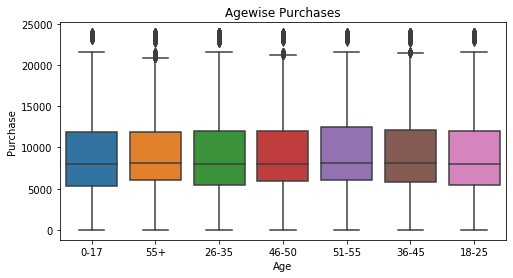

In [9]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,4
sns.boxplot(x = "Age", y = "Purchase", data = train)
plt.title("Agewise Purchases")
plt.show()

**INTUITION FROM THE ABOVE GRAPH**

The median value of purchase across all ages is approximately the same looking at the graph above. 

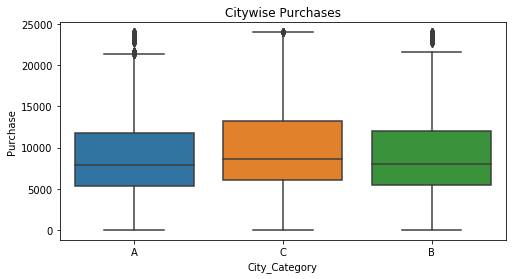

In [10]:
sns.boxplot(x = "City_Category", y = "Purchase", data = train)
plt.title("Citywise Purchases")
plt.show()

**INTUITION FROM THE ABOVE GRAPH**

People from City C purchase more and their distribution is fairly uniform with only a few potential outliers.

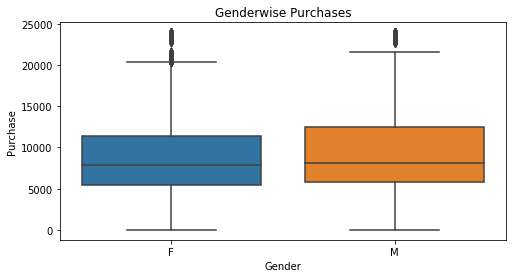

In [11]:
sns.boxplot(x = "Gender", y = "Purchase", data = train)
plt.title("Genderwise Purchases")
plt.show()

**INTUITION FROM THE ABOVE GRAPH**

Both males and females seem to have similar purchasing patterns from the above graph with males tending to have slightly higher purchasing amount.

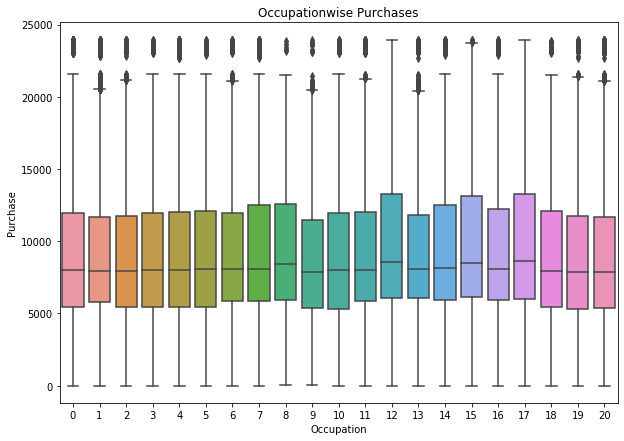

In [12]:
rcParams['figure.figsize'] = 10, 7
sns.boxplot(x = "Occupation", y = "Purchase", data = train)
plt.title("Occupationwise Purchases")
plt.show()

 **INTUITION FROM THE ABOVE GRAPH**

People across different occupation streams seem to have similar purchase patterns in general with the median purchasing capacity of around 7k-8k currency units.

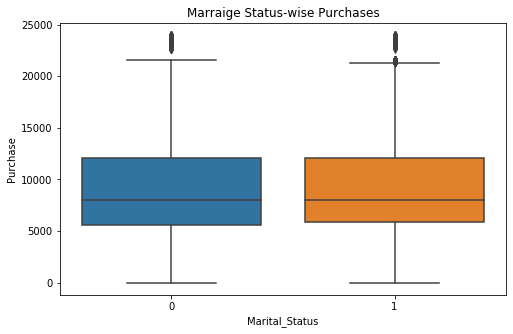

In [13]:
rcParams['figure.figsize'] = 8,5
sns.boxplot(x = "Marital_Status", y = "Purchase", data = train)
plt.title("Marraige Status-wise Purchases")
plt.show()

 **INTUITION FROM THE ABOVE GRAPH**

Both married and single people purchase the similar amount of goods as the median of both of them seem to be almost the same. 

A notable insight is that there seem to be larger spread of potential outliers in the married folks than in the single folks.

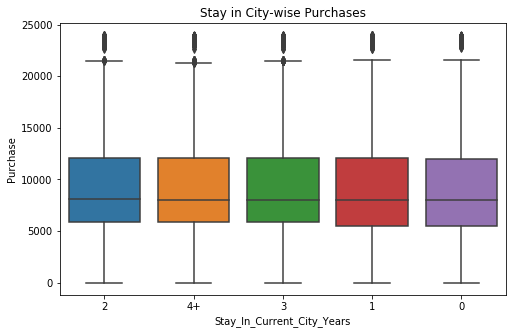

In [14]:
sns.boxplot(x = "Stay_In_Current_City_Years", y = "Purchase", data = train)
plt.title("Stay in City-wise Purchases")
plt.show()

 **INTUITION FROM THE ABOVE GRAPH**

Based on the stay in current city, there's no significant demarcation in the purchase amount of different people as the distribution is centered around the same value of around 7.5k currency units for all the different classes and the spread of data is also similar.

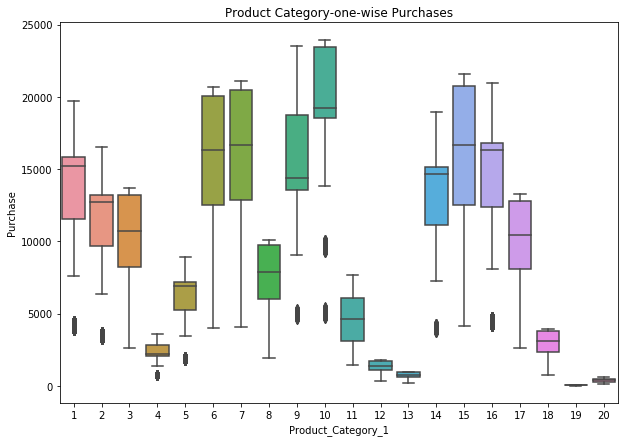

In [15]:
rcParams['figure.figsize'] = 10, 7
sns.boxplot(x = "Product_Category_1", y = "Purchase", data = train)
plt.title("Product Category-one-wise Purchases")
plt.show()

 **INTUITION FROM THE ABOVE GRAPH**

This is an awesome category since it's giving almost a great demarcation between purchase of different groups of people. The medians of different categories are far apart from one another and that's a good quality for a predictor to have. 

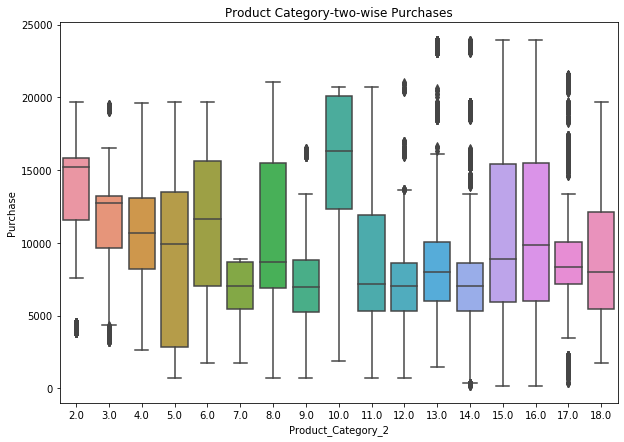

In [16]:
sns.boxplot(x = "Product_Category_2", y = "Purchase", data = train)
plt.title("Product Category-two-wise Purchases")
plt.show()

 **INTUITION FROM THE ABOVE GRAPH**

This is a good category as it's providing a decent separation between purchase of different groups of people. The medians of different categories are far apart (not as much as product category 1) from one another. This will help in prediction of the purchases of the items.

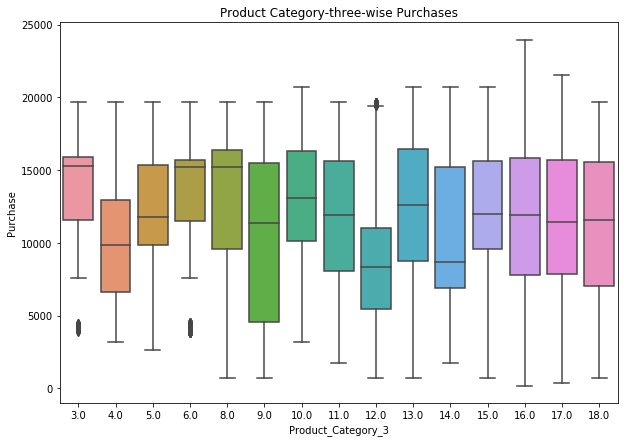

In [17]:
sns.boxplot(x = "Product_Category_3", y = "Purchase", data = train)
plt.title("Product Category-three-wise Purchases")
plt.show()

 **INTUITION FROM THE ABOVE GRAPH**

This is a not so good a category as since every product's purchase value for different customers is almost within a similar range.

# Imputation

We will try to do target encoding of product-categories 2 and 3 based on product-category-1. Let's see how we can accomplish that.

In [18]:
train.groupby(by = ['Product_Category_1']).Product_Category_3.nlargest(1)

Product_Category_1       
1                   734      18.0
2                   837      18.0
3                   2915     16.0
4                   2946     18.0
5                   142      18.0
6                   332      16.0
8                   30121    18.0
10                  576      16.0
11                  287      16.0
12                  249      17.0
13                  2607     16.0
15                  2599     17.0
Name: Product_Category_3, dtype: float64

In [19]:
prod2Substitute = pd.crosstab(train.Product_Category_1, train.Product_Category_2, dropna = False).idxmax(axis = 1).to_dict()
prod3Substitute = pd.crosstab(train.Product_Category_1, train.Product_Category_3, dropna = False).idxmax(axis = 1).to_dict()

In [20]:
pd.crosstab(train.Product_Category_1, train.Product_Category_2, dropna = False)#.idxmax(axis = 1).to_dict()

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Product_Category_1,,,,,,,,,,,,,,,,,
1,49217,119,685,11267,10644,0,15471,0,0,4836,0,1021,4568,18544,14828,1865,715
2,0,2765,8134,4153,187,0,2615,1514,0,0,144,0,488,1342,535,879,178
3,0,0,16858,2264,0,0,0,0,0,0,595,26,0,231,0,0,0
4,0,0,0,8551,0,0,2177,469,0,113,186,0,0,114,0,0,0
5,0,0,0,0,5635,626,31670,3292,2,6796,2894,1375,25588,5656,873,1490,1336
6,0,0,0,0,0,0,12071,0,2643,716,0,39,0,0,4004,0,0
7,0,0,0,0,0,0,84,0,0,0,118,0,0,0,0,98,0
8,0,0,0,0,0,0,0,418,398,1672,1591,5028,20771,4322,10512,7945,508
9,0,0,0,0,0,0,0,0,0,0,0,0,0,409,0,0,0


In [21]:
pd.crosstab(train.Product_Category_1, train.Product_Category_3, dropna = False)#.idxmax(axis = 1).to_dict()

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Product_Category_1,,,,,,,,,,,,,,,
1,613,643,7982,4890,8014,5621,0,1588,1091,2106,6429,21748,18567,9314,2536
2,0,1232,2022,0,2422,2679,989,0,438,0,1686,3451,567,0,823
3,0,0,6654,0,178,527,0,0,4707,0,0,0,396,0,0
4,0,0,0,0,1079,2115,0,0,1190,113,0,671,0,0,181
5,0,0,0,0,869,637,0,217,1820,601,8660,270,2621,2245,1071
6,0,0,0,0,0,0,737,0,0,2639,1104,871,3047,0,0
8,0,0,0,0,0,0,0,0,0,0,549,1002,2666,4833,18
10,0,0,0,0,0,0,0,0,0,0,0,0,1755,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,1961,0,0


In [22]:
train.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [23]:
dont_check_prod_2 = [1,7,9,14,16,17,18,19,20]

From the crosstab we can see that for products with product_category_1 7,9,14 there's no datapoint which has any non-nan value for these datapoints. Hence, they cannot be mode imputed based on product_category_1. 

In [24]:
l = [0] * train.shape[0]
m = [0] * train.shape[0]

In [25]:
for i in train[(train.Product_Category_2.isnull()) | (train.Product_Category_3.isnull())].index:
    prod1 = train.Product_Category_1[i]
    # Impute the category 2 with respect to mode of category 1 values
    if np.isnan(train.Product_Category_2[i]) & (prod1 <= 15):
        to_sub = prod2Substitute[prod1]
        l[i] = to_sub
    else:
        l[i] = train.iloc[i,9]
        
    #Impute the category 3 with respect to mode of category 1 values
    if np.isnan(train.Product_Category_3[i]) & (prod1 not in dont_check_prod_2):
        to_sub = prod3Substitute[prod1] 
        m[i] = to_sub
    else:
        m[i] = train.iloc[i,10]

In [26]:
train.Product_Category_2 = l
train.Product_Category_3 = m

In [27]:
print(np.round(100 * train.isnull().sum() / train.shape[0], 2))

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2             3.21
Product_Category_3            13.19
Purchase                       0.00
dtype: float64


In [28]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [29]:
# Do with test what was done with train
l = [0] * test.shape[0]
m = [0] * test.shape[0]

for i in test[(test.Product_Category_2.isnull()) | (test.Product_Category_3.isnull())].index:
    try:
        prod1 = test.Product_Category_1[i]
        # Impute the category 2 with respect to mode of category 1 values
        if np.isnan(test.Product_Category_2[i]) & (prod1 <= 15):
            to_sub = prod2Substitute[prod1]
            l[i] = to_sub
        else:
            l[i] = test.iloc[i,9]
    except:
        l[i] = np.nan
        pass
    
    try:
        #Impute the category 3 with respect to mode of category 1 values
        if np.isnan(test.Product_Category_3[i]) & (prod1 not in dont_check_prod_2):
            to_sub = prod3Substitute[prod1] 
            m[i] = to_sub
        else:
            m[i] = test.iloc[i,10]
    except:
        m[i] = np.nan
        pass

test.Product_Category_2 = l
test.Product_Category_3 = m

In [30]:
np.round( 100 * test.isnull().sum()/test.shape[0], 2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2             2.41
Product_Category_3            12.55
dtype: float64

In [31]:
# Mode encode remaining null values in test
test['Product_Category_2'].fillna(test['Product_Category_2'].mode()[0], inplace=True)
test['Product_Category_3'].fillna(test['Product_Category_3'].mode()[0], inplace=True)
np.round( 100 * test.isnull().sum()/test.shape[0], 2)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
dtype: float64

In [32]:
# Mode encode null values in train
train['Product_Category_2'].fillna(train['Product_Category_2'].mode()[0], inplace=True)
train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0], inplace=True)
train.shape

(550068, 12)

In [33]:
np.round(train.isnull().sum(), 2)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Feature Addition

Engineer a feature based on product category 1. This feature will be mean purchase price for a particular Product_ID. Possibly some product_IDs that are in test may not be in train but since that fraction is miniscule i.e. less than a fraction of a percent, we can add this column and impute the feature later on. 

In [34]:
sub_dict = train.groupby(by = ['Product_ID'])['Purchase'].mean().to_dict()

l = []
m = []

for i in train.Product_ID:
    if i in sub_dict.keys():
        l.append(sub_dict[i])
    else:
        l.append(np.nan)
    
for j in test.Product_ID:
    if j in sub_dict.keys():
        m.append(sub_dict[j])
    else:
        m.append(np.nan)

train['AvgPrice'] = l
test['AvgPrice'] = m

In [35]:
print(test.AvgPrice.median(), train.AvgPrice.median())
test['AvgPrice'].fillna(train.AvgPrice.median(), inplace=True)

7827.080459770115 7785.07476635514


# Dummification of categorical columns

In [36]:
cat_cols = []
for i in train.columns:
    if not i in ["AvgPrice","Purchase", 'User_ID', 'Product_ID']:
        cat_cols.append(i)

In [37]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3                7
Purchase                      18105
AvgPrice                       3625
dtype: int64

In [38]:
test.nunique()

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              17
Product_Category_3               7
AvgPrice                      3445
dtype: int64

Drop userid and product id from our data 

In [39]:
# User_ID
train.set_index(train['User_ID'], inplace = True)
test.set_index(test['User_ID'], inplace = True)

train.drop(columns = ['User_ID', 'Product_ID'], axis = 1, inplace = True)
test.drop(columns = ['User_ID','Product_ID'], axis = 1, inplace = True)

In [40]:
train = pd.get_dummies(data = train, columns = cat_cols, drop_first = True)
test = pd.get_dummies(data = test, columns = cat_cols, drop_first = True)

In [41]:
train.head()

,Purchase,AvgPrice,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,...,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_3_5.0,Product_Category_3_9.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,8370,11870.863436,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1000001,15200,16304.030981,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000001,1422,1237.892157,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000001,1057,1455.140762,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000002,7969,7692.763547,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
test_not_train = list(set(test.columns).difference(set(train.columns)))
train_not_test = list(set(train.columns).difference(set(test.columns)))
train_not_test.remove('Purchase')

print(train_not_test, test_not_train)

train.drop(columns = train_not_test, inplace = True)
print(test.shape)
print(train.shape)

['Product_Category_1_20', 'Product_Category_1_19'] []
(233599, 74)
(550068, 75)


# Train - Test Split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns = ['Purchase']), train['Purchase'], test_size = 0.25, random_state = 0)

# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
LR = LinearRegression().fit(X_train, y_train)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = LR.predict(X_val)

In [47]:
print('\nlinear model intercept (b): {:.3f}\n'
     .format(LR.intercept_))
print('R-squared score (training): {:.3f}\n'
     .format(LR.score(X_train, y_train)))
from math import sqrt
LR_rmse = sqrt(mean_squared_error(y_val, y_pred))
LR_mae = mean_absolute_error(y_val, y_pred)
LR_rmse


linear model intercept (b): -100.664

R-squared score (training): 0.722



2631.292182134582

In [48]:
mape = 0
count = 0
for i,j in zip(list(y_val), list(y_pred)):
    error = abs(i - j)/i
    mape = mape + error
    count = count + 1
mape = 100 * mape / len(y_train) 

In [49]:
LR_scores = [LR_rmse**2, LR_rmse, LR_mae, mape]

In [50]:
print("Mean absolute Percent Error = {:.3f}".format(mape))

Mean absolute Percent Error = 10.503


# Lasso Regression

In [51]:
# from sklearn.linear_model import Lasso
# results = []
# for i in list(np.logspace(-5, 5, 5)):
#     lasso = Lasso(alpha = i).fit(X_train, y_train)
#     rmse = sqrt(mean_squared_error(y_val, lasso.predict(X_val)))
#     results.append([i, rmse])

# table = pd.DataFrame(results, columns=['Alpha', 'RMSE_Value'])
# print(table.head(10))
# print()
#print(table[table.Test_Accuracy == table.Test_Accuracy.max()])

In [52]:
# lasso_rmse = table[table.RMSE_Value == table.RMSE_Value.min()]
# mse = lasso_rmse ** 2
# lasso_rmse

# Decision Tree

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

DR = DecisionTreeRegressor(criterion = "mse", max_depth = 10)

param_grid = {
             'max_depth':[5,8,10,12,15,18,20,30,40,50],
             'criterion':['mse']
             }

RSCV = RandomizedSearchCV(estimator = DR, param_distributions = param_grid, 
                          scoring = "neg_mean_squared_error", refit = True)

RSCV.fit(X_train, y_train)
print(RSCV.best_estimator_)

C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [54]:
ypred_RSCV = RSCV.predict(X_val)
MAE_RSCV = mean_absolute_error(y_true = y_val, y_pred = ypred_RSCV)
MSE_RSCV = mean_squared_error(y_true = y_val, y_pred = ypred_RSCV)
mape = 100 * np.mean(abs(np.array(ypred_RSCV) - np.array(y_val))/np.array(y_val))
DT_scores = [MSE_RSCV, sqrt(MSE_RSCV),  MAE_RSCV, mape]

In [55]:
DT_scores

[6943561.241158896, 2635.0638021040204, 1946.2129207171563, 29.366438651719058]

In [56]:
pd.DataFrame({'Importances':np.round(RSCV.best_estimator_.feature_importances_,3)}, index = X_train.columns).sort_values(by = ['Importances'], ascending = False)

,Importances
AvgPrice,0.997
City_Category_C,0.001
Gender_M,0.001
Product_Category_3_15.0,0.000
Product_Category_3_16.0,0.000
...,...
Occupation_16,0.000
Occupation_15,0.000
Occupation_14,0.000
Occupation_13,0.000


# Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 25, criterion = 'mse', max_depth = 20)
RFR.fit(X_train, y_train)

y_pred_RFR = RFR.predict(X_val)
RFR_mape = 100 * np.mean(abs(np.array(y_val) - np.array(y_pred_RFR))/np.array(y_pred_RFR))
RFR_mae = mean_absolute_error(y_val, y_pred_RFR)
RFR_mse = mean_squared_error(y_val, y_pred_RFR)
RFR_rmse = RFR_mse ** 0.5
RFR_scores = [RFR_mse, RFR_rmse, RFR_mae, RFR_mape]
RFR_scores

[6974962.183735556, 2641.0153698408412, 1944.2063115776937, 22.237919874153544]

# Adaboost Regressor

In [58]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
DR = DecisionTreeRegressor(criterion = 'mse', max_depth = 20, random_state = 12).fit(X_train, y_train)

ADBReg = AdaBoostRegressor(base_estimator = DR, n_estimators=20, learning_rate=0.1)
ADBReg.fit(X_train, y_train)

y_pred_ADB = ADBReg.predict(X_val)
ADB_mape = 100 * np.mean(abs(np.array(y_val) - np.array(y_pred_ADB))/np.array(y_pred_ADB))
ADB_mae = mean_absolute_error(y_val, y_pred_ADB)
ADB_mse = mean_squared_error(y_val, y_pred_ADB)
ADB_rmse = ADB_mse ** 0.5
ADB_metrics = [ADB_mse, ADB_rmse, ADB_mae, ADB_mape]
ADB_metrics

[6981367.060152691, 2642.2276700073917, 1937.5967047397803, 22.21975630909165]

In [59]:
models_metrics = pd.DataFrame({"LinReg":LR_scores, "Decision Tree":DT_scores, "Random Forest":RFR_scores, "Adaboost": ADB_metrics}, index = ['MSE', 'RMSE', 'MAE', 'MAPE'])
print(round(models_metrics,2))

          LinReg  Decision Tree  Random Forest    Adaboost
MSE   6923698.55     6943561.24     6974962.18  6981367.06
RMSE     2631.29        2635.06        2641.02     2642.23
MAE      1947.01        1946.21        1944.21     1937.60
MAPE       10.50          29.37          22.24       22.22


In [60]:
y_pred_test = LR.predict(test)

In [61]:
pd.DataFrame({"User_ID":test.index,"Product_ID":original_test.Product_ID, "Purchase":y_pred_test}).to_csv(path_or_buf = "Predictions_Linear_Regression.csv", index = False)